In [3]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    #plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")



In [7]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")


In [5]:
snd = parselmouth.Sound("Test_Lab/Sound_Files/before-skull.wav")

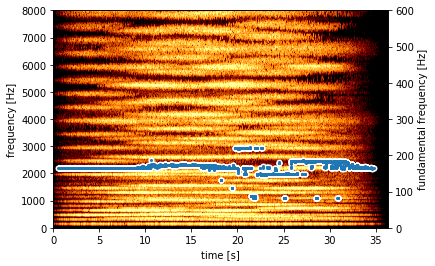

In [8]:
pitch = snd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")

In [13]:
for i in (pitch.selected_array['frequency']):
    if i!=0:
        print(i)

164.66144190528348
164.4389327553751
164.44861200957268
164.45006919531474
164.57275080391952
164.54232930747327
164.4391262380773
164.50890459943435
164.70479483540768
164.88411039833335
164.94085822049882
164.9245082720067
164.97982047057906
165.05114186803456
165.04304930226533
164.95854954037014
164.8518902993131
164.8160178235226
164.75467089858788
164.56477507332875
164.50410924555698
164.49655542179838
164.54850404551462
164.70263799967316
164.70199121732884
164.72007765421174
164.59436674534632
164.35314813181003
164.22263248618526
164.07304343111772
164.0926420407079
164.08208957741564
164.20407946849943
164.21312966853762
164.43730708201383
164.62191585492658
164.72802374639042
164.79808303731
164.77103687380838
164.85591166797718
164.92575427783854
164.83593361445241
164.6558546033812
164.43560320104575
164.0167754096809
163.73664949487858
163.9287644788458
164.26879075981196
164.36944107819457
164.33577698436554
164.49106700318575
164.5653730391363
164.6251290486066
164.662

147.1167082064669
147.14924942390846
147.3573349526669
147.66797103040537
148.48542013587084
149.2539868938577
151.9046945518219
149.51170494481286
149.0541667211554
148.64433553563302
148.21316534504126
148.33643250547397
147.94835856015965
148.99643193743196
148.48146679954286
147.62635937357365
147.63105888048037
147.58381792418646
147.58886055851363
147.7979812974254
147.8484015043649
148.28060968138857
147.88751279175082
148.0880623480097
148.32895069745885
160.5678115808546
163.5621429779388
165.26737219929282
163.8931488273015
162.15503113407988
161.52412827214863
159.5703886954103
159.62166279898216
159.65797555070773
159.55564661666878
159.5144972359226
160.8687034772737
161.59365268760095
159.94639022288644
159.55042110297728
149.54861204690977
148.88315986626844
148.48961987817225
147.95500168858644
147.6885271559361
147.478224394651
147.35032275253621
147.31397299116603
147.27348015159177
147.13448602197428
147.5803059431005
148.04420608981323
148.36242732812013
148.0957756

In [16]:
pitch.xs()

array([2.12244898e-02, 3.12244898e-02, 4.12244898e-02, ...,
       3.63212245e+01, 3.63312245e+01, 3.63412245e+01])

In [18]:
snd_in = parselmouth.Sound("Test_Lab/Sound_Files/before-skull.wav")
snd_out = parselmouth.Sound("Test_Lab/Sound_Files/inside-skull.wav")

In [19]:
pitch_in = snd_in.to_pitch()
pitch_out = snd_out.to_pitch()

<Figure size 432x288 with 0 Axes>

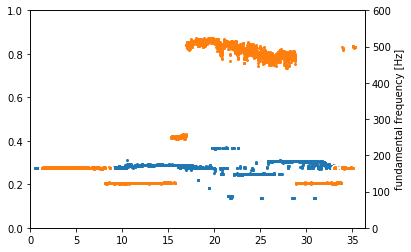

In [30]:
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
plt.figure()
#draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch_in)
draw_pitch(pitch_out)
plt.xlim([snd.xmin, snd.xmax])
plt.show()